## Project Setup

In [284]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
from datetime import datetime

In [285]:
pd.plotting.register_matplotlib_converters()

In [286]:
datasets_dir = str(Path(os.path.abspath('')).parent.joinpath("datasets"))

## OWID COVID-19 Dataset

### Dataset Cleanup

In [287]:
raw_covid_df = pd.read_csv(f"{datasets_dir}/owid-covid-data.csv")

In [288]:
raw_covid_df.tail(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
47956,NaN,NaN,International,2020-10-02,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47957,NaN,NaN,International,2020-10-03,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47958,NaN,NaN,International,2020-10-04,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
mon_year_of = lambda str_date: datetime\
                                .strptime(str_date, "%Y-%m-%d")\
                                .strftime('%Y-%m')

In [290]:
staging_covid_df = raw_covid_df[raw_covid_df['continent'].notnull()].reset_index()

In [291]:
staging_covid_df['year_month'] = staging_covid_df.apply(lambda row: mon_year_of(row['date']), axis=1)

In [292]:
staging_covid_df.tail(3)

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,year_month
47398,47398,ZWE,Africa,Zimbabwe,2020-10-02,7850.0,12.0,14.000,228.0,0.0,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,2020-10
47399,47399,ZWE,Africa,Zimbabwe,2020-10-03,7858.0,8.0,10.143,228.0,0.0,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,2020-10
47400,47400,ZWE,Africa,Zimbabwe,2020-10-04,7885.0,27.0,11.714,228.0,0.0,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,2020-10


In [293]:
covid_df = staging_covid_df.groupby(['year_month', 'continent', 'location', 'iso_code'], as_index=False)\
            .agg({'new_cases': sum, 'new_deaths': sum})\
            .sort_values(by=['year_month', 'continent','location'],
                         ascending=[True, True, True])

In [294]:
covid_df.head(3)

,year_month,continent,location,iso_code,new_cases,new_deaths
0,2019-12,Africa,Algeria,DZA,0.0,0.0
1,2019-12,Africa,Egypt,EGY,0.0,0.0
2,2019-12,Africa,Nigeria,NGA,0.0,0.0


### Bar Plotting - New Cases/Deaths

In [351]:
def bar_plot_cases_for(country: str):
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 4))

    sns.barplot(x='year_month', 
                y=covid_df[covid_df['location']==country]['new_cases'],
                data=covid_df)
    
    plt.xlabel("Period (Month/Year)")
    plt.ylabel("New Cases")
    plt.title(f"New Cases per Month ({country})")
    plt.show()

In [352]:
def bar_plot_deaths_for(country: str):
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 4))

    sns.barplot(x='year_month', 
                y=covid_df[covid_df['location']==country]['new_deaths'],
                data=covid_df)
    
    plt.xlabel("Period (Month/Year)")
    plt.ylabel("New Deaths")
    plt.title(f"New Deaths per Month ({country})")
    plt.show()

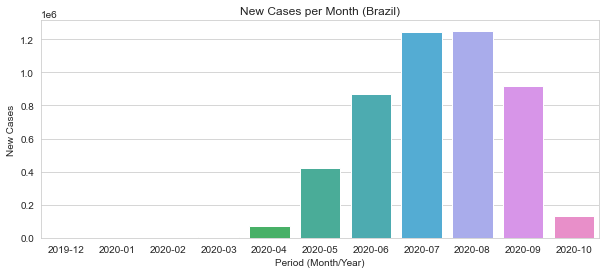

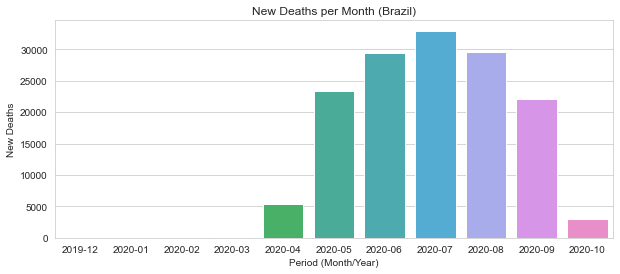

In [511]:
bar_plot_cases_for("Brazil")
bar_plot_deaths_for("Brazil")

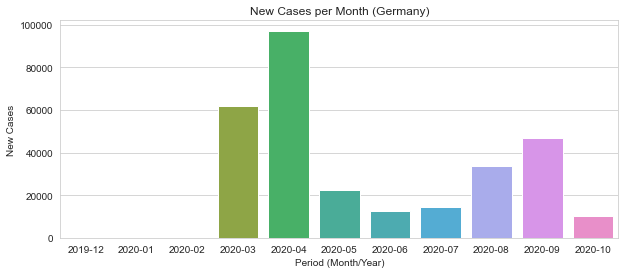

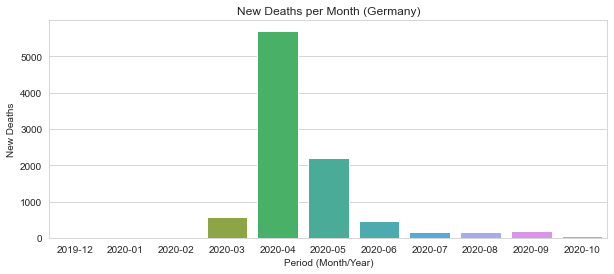

In [354]:
bar_plot_cases_for("Germany")
bar_plot_deaths_for("Germany")

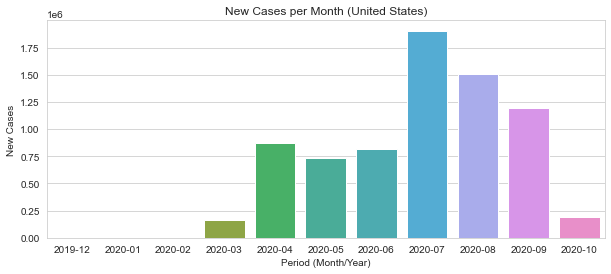

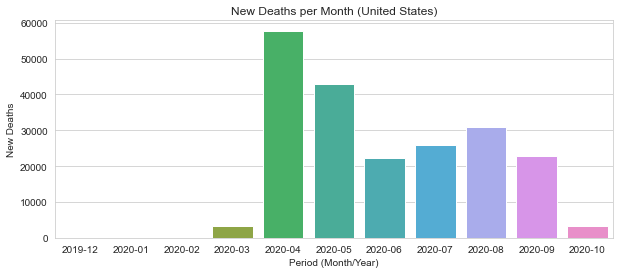

In [355]:
bar_plot_cases_for("United States")
bar_plot_deaths_for("United States")

### Scatter Plotting

In [514]:
df = covid_df[(covid_df['location'] == 'Brazil') | 
              (covid_df['location'] == 'United States') |
              (covid_df['location'] == 'Germany') |
              (covid_df['location'] == 'France') |
              (covid_df['location'] == 'United Kingdom') |
              (covid_df['location'] == 'China')]

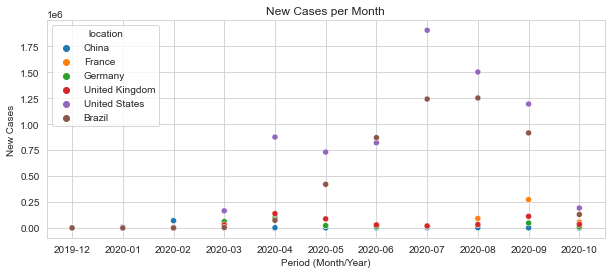

In [515]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))

sns.scatterplot(x='year_month', 
                y=df['new_cases'],
                hue=df['location'],
                data=df)

plt.xlabel("Period (Month/Year)")
plt.ylabel("New Cases")
plt.title(f"New Cases per Month")
plt.show()

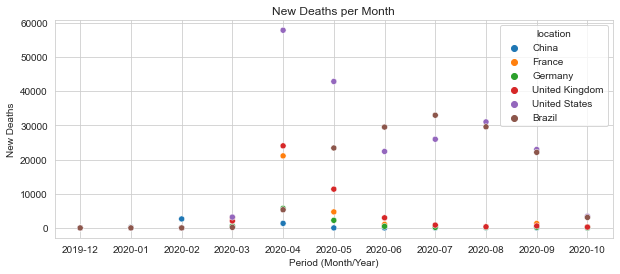

In [517]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))

sns.scatterplot(x='year_month', 
                y=df['new_deaths'],
                hue=df['location'],
                data=df)

plt.xlabel("Period (Month/Year)")
plt.ylabel("New Deaths")
plt.title(f"New Deaths per Month")
plt.show()